# Descrição

Estamos partindo da ideia que fundamos uma empresa de telefonia móvel. E como somos novatos nessa área, não sabemos estimar o preço para os celulares fabricados.
Como queremos bater de frente com grandes empresas como Apple, Samsung etc. Não podemos simplismente supor um valor qualquer.

Dito isso, para resolver esse problema, nós buscamos e coletamos os dados de vendas dos celulares de diversas empresas.

Com isso, nós esperamos descobrir alguma relação entre as características do celular (Memória RAM, Processador, Armazenamento) e seu preço de venda. 
Atraves do Machine Learning pretendemos estimar faixa de preço indicando o quão alto é o preço, e não o preço real.

O conjunto de dados é descrito da seguinte forma:

Atributo        | Tipo do dado  | Descrição
|---------------|:-------------:|:-------------:|
| id            | Integer       |   Identificador | 
| bateria_power | Integer       |   Energia total que uma bateria pode armazenar em um tempo medido em mAh | 
| blue          | Boolean       |   Tem bluetooth ou não   | 
| clock_speed   | Float         |   Velocidade na qual o microprocessador executa instruções|
| dual_sim      | Boolean       |   Tem suporte dual sim ou não|
| fc            | Integer       |   Mega pixels da câmera fontal   |
| four_g        | Boolean       |   Tem 4G ou não  |
| int_memory    | Integer       |   Memória internar em Gigabytes |
| m_dep         | Float         |   Profundidade do celular em cm|
| mobile_wt     | Integer       |   Peso do celular |
| n_cores       | Integer       |   Número de núcleos do processador |
| pc            | Integer       |   Mega pixels da câmera principal|
| px_height     | Integer       |   Altura da resolução do pixel|
| px_width      | Integer       |   Largura da resolução do pixel|
| ram           | Integer       |   Memória RAM em Megabytes|
| sc_h          | Integer       |   Altura da tela do celular em cm|
| sc_w          | Integer       |   Largura da tela do celular em cm|
| talk_time     | Integer       |   Maior tempo que uma única carga da bateria durará quando você estiver em 100%|
| three_g       | Boolean       |   Tem 3G ou não|
| touch_screen  | Boolean       |   Tem touch screen ou não|
| wifi          | Boolean       |   Tem wifi ou não|
| price_range   | Integer       |   0: Baixo, 1: Médio, 2: Alto, 3: Muito Alto|

Os dados foram retirados do kaggle: [mobile price classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification).


## Explorando os dados

In [119]:
# Imports
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns # Biblioteca de visualização mais elaborada baseada no matplotlib
import numpy as np
from six import StringIO  
from IPython.display import Image  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# Cross-Validation modelos.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [93]:
# Carregando o dataset com 2000 instancias
df = pd.read_csv("datasetMobile/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Estatísticas descritivas do conjunto de dados
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Verificando se têm alguma célula vazia no arquivo.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
# Preparando separando os dados em feature e target.
data_X = df.drop('price_range', axis=1)
data_Y = df['price_range']

<AxesSubplot:ylabel='price_range'>

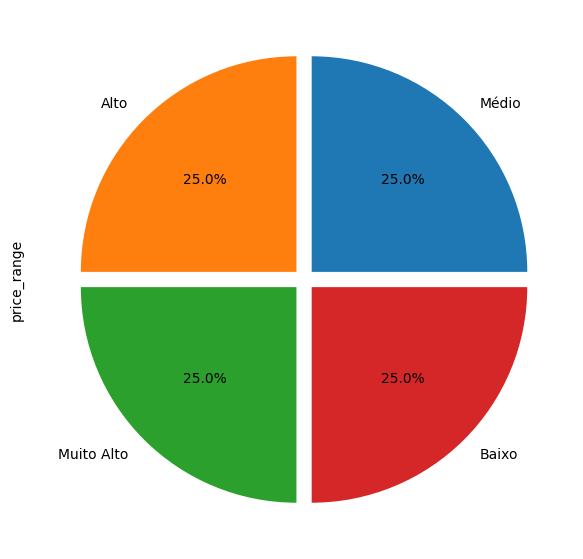

In [131]:
mylabels = [ "Médio", "Alto","Muito Alto", "Baixo"]
data_Y.value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05],  labels = mylabels, figsize=(7, 7))

### Analisando a correlação entre as variáveis numéricas

Para identificar a relação entre as variáveis numéricas, vamos fazer uma análise bivariada para entender o comportamento.

Faremos uso da biblioteca [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 
Em termos de força de relacionamento, o valor do coeficiente de correlação varia entre +1 e -1. Um valor de ± 1 indica um grau perfeito de associação entre as duas variáveis. À medida que o valor do coeficiente de correlação se aproxima de 0, a relação entre as duas variáveis ​​será mais fraca. A direção da relação é indicada pelo sinal do coeficiente; um sinal + indica uma relação positiva e um sinal - indica uma relação negativa.
Mais informações na [documentação](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404).

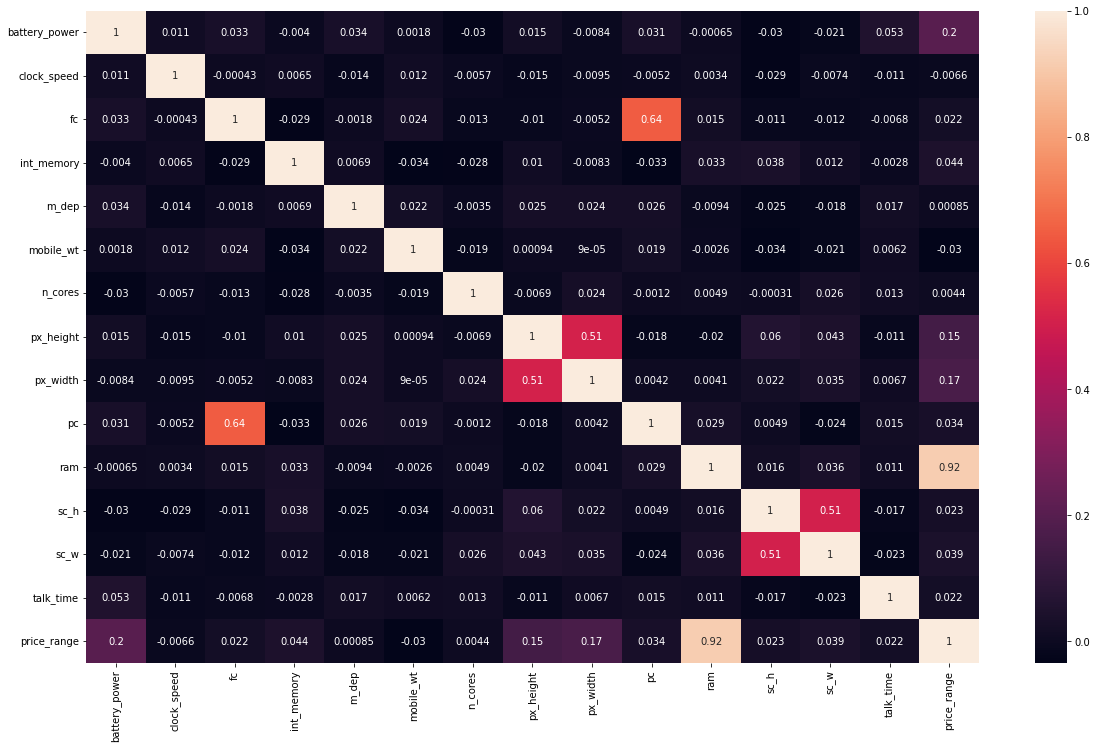

In [8]:
data_numeric = df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time','price_range']]
sns.heatmap(data=data_numeric.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Podemos notar as correlações:
- pc e fc = ``0,64``
- px_height e px_width = ``0,51``

Essas duas correlações estão um pouco altas, mas não altas o suficiente para termos que nos preoucpar. Já que <strong>px_height</strong> e <strong>px_width</strong> serem correlacionadas faz sentido, pois essas variáveis dependem do tamanho do telefone e são proporcionalmente relacionadas. O mesmos se aplica as atributos <strong>pc</strong> e <strong>fc</strong>.

### Analisando a correlação entre as variáveis categóricos


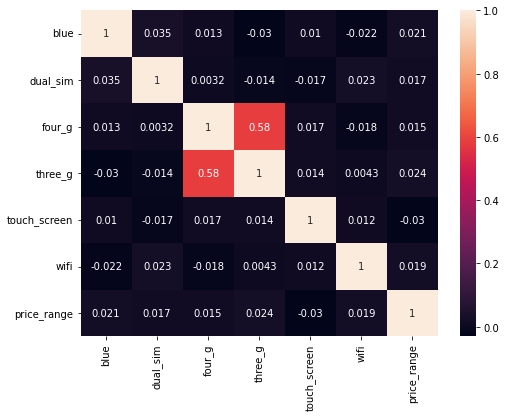

In [9]:
data_categorical = df.drop(['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores',
                   'px_height','px_width','pc','ram','sc_h','sc_w', 'talk_time'],axis=1)

sns.heatmap(data=data_categorical.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Podemos notar as correlações:

- três_g e quatro_g = ``0,58``

A correlação entre **three_g** e **four_g** não é de estranhar, pois cada celular terá um ou outro.

### Analisando a correlação entre price_range e TODAS as variáveis


<AxesSubplot:>

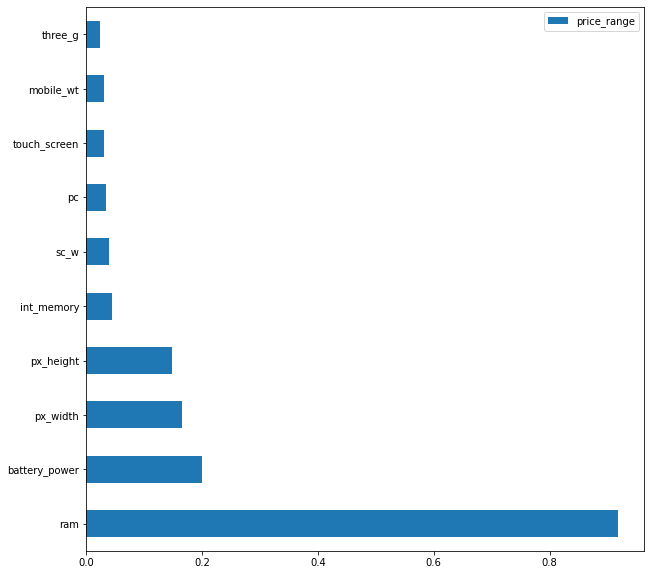

In [10]:
correlacao = np.absolute(df.corr()['price_range']).sort_values(ascending=False).head(11).to_frame().drop('price_range')
correlacao.plot.barh(y='price_range',figsize = (10,10))

Aqui podemos ver os 10 principais recursos correlacionados com price_range. Esses recursos serão os que mais contribuirão para o poder preditivo de nossos modelos.

Faz sentido que bateria_power seja uma das características importantes relacionadas ao preço. Um telefone mais caro provavelmente tem uma bateria melhor! Também faz sentido que px_height e px_width estejam entre os principais recursos, já que o preço do telefone provavelmente depende de seu tamanho.

Vale lembrar que o valor absoluto das correlações foi tomado aqui para comparar a magnitude. Devemos ter em mente que alguns desses recursos estão negativamente correlacionados com price_range.

### Analisando todos os dados

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>],
       [<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>]

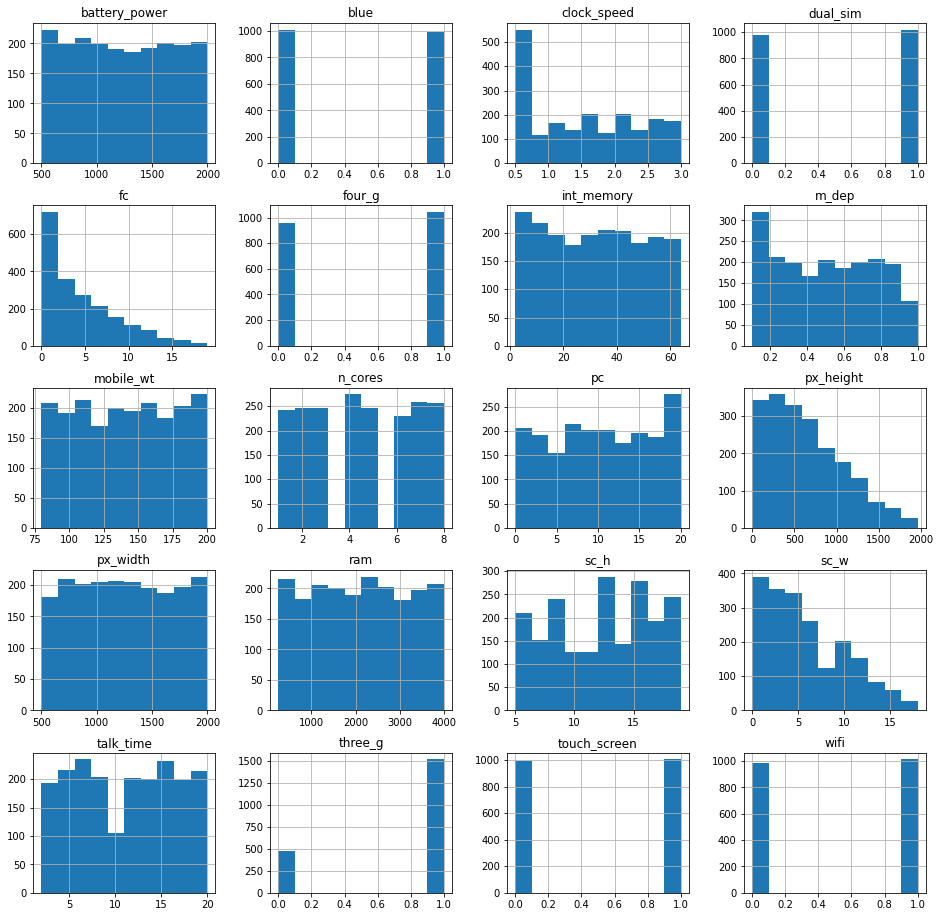

In [11]:
labels = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
data_X.hist(figsize = (16,16))

Podemos notar que existem dados estão em um intervalo diferente. Poderiamos padronizá-los, mas cada caso é um caso, para os calssificadores de árvores de decisão não é necessario. Já para outros modelos lineares, seria interessante tentamor manter um padrão nos dados.

Todos os dados são distribuídos uniformemente ou normalizados, mas sc_w e fc têm dados distorcidos. Precisamos powertransform aqueles para remover a assimetria. Vamos manter assim por hora. Posteriormente se os resultados não forem bons. Nós vamos mexer nisso.
Mais informações sobre powertransform: [powertransform](https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94)

## Ávore de Descição


Usaremos sklearn e diferentes técnicas de classificador, tais como:

-   LinearRegression
-   ElasticNet
-   Ridge
-   Lasso
-   DecisionTreeClassifier

Porém primeiramente vamos tratar da árvore de decisão individualmente. Iremos usar todas as featres como dividida na ``célula 6``.
Sendo as features mostrano no print abaixo e o target a coluna ``price_range``

In [86]:
# Preparando separando os dados em feature e target.
print(data_X.columns.tolist())
X = data_X
y = data_Y

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


## Experimento 1

Iramos começar dividindo manualmenteo conjunto de dados em 80% treinamento e 20% teste.

Nossa árvore fará o uso do metodo `gini` por ser mais rapito computacionalmente.

In [121]:
train = 0.8
test = 1 - train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train)

# Criação do modelo classificador de árvore de decisão, por default o DecisionTreeClassifier ja vem com gini ativado, porem vamos dar enfase nesse criterio.
modelo = DecisionTreeClassifier(criterion="gini")

# Agora iremos treinar o nosso modelo, utilizando a função fit do sklearn, usaremos os conjuntos de dados de treino que tínhamos preparados anteriormente.
modelo = modelo.fit(X_train, y_train)

### Gerando Árvore

Treinamento: 80.00% Teste: 20.00%
Acurácia teste: 82.00%
Acurácia treinamento: 100.00%
Acurácia total: 96.40%


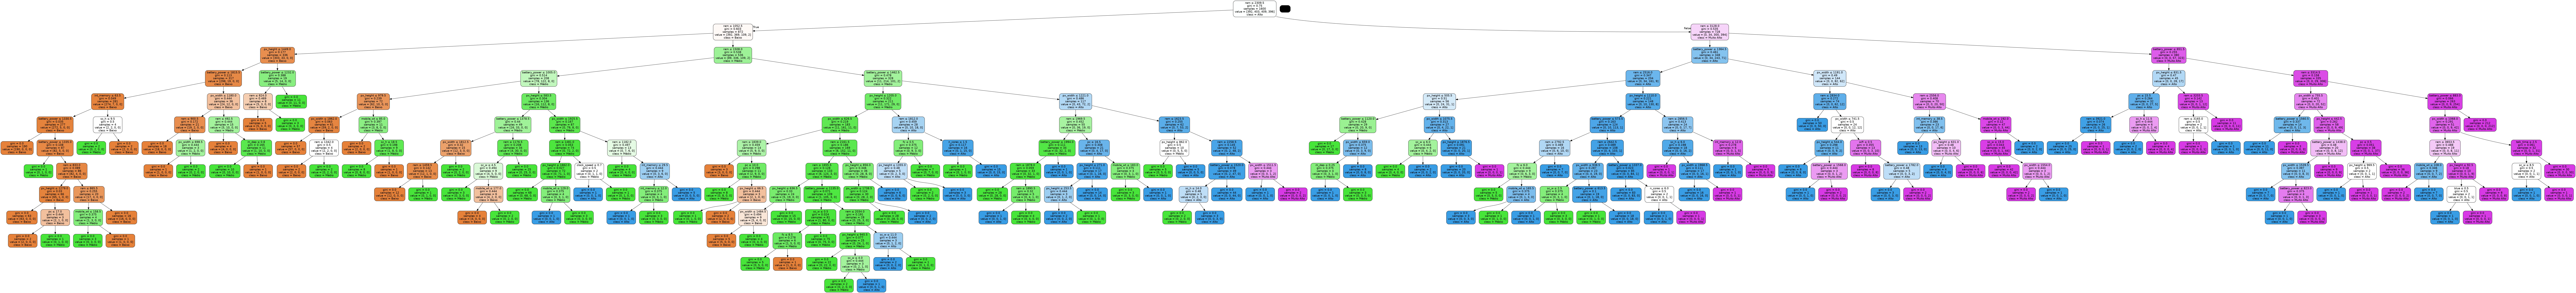

In [130]:
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Baixo','Médio', 'Alto','Muito Alto' ])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore_1.png')

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Treinamento: {:.2f}% Teste: {:.2f}%".format(train*100, test*100))
print("Acurácia teste: {:.2f}%".format(modelo.score(X_test, y_test)*100))
print("Acurácia treinamento: {:.2f}%".format(modelo.score(X_train, y_train)*100))
print("Acurácia total: {:.2f}%".format(modelo.score(X, y)*100))

Image(graph.create_png())


Como podemos notar, nossa árvore possui uma profundidade de 14 níveis. Podemos limitar essa profundidade para ser menor que 14, e verificar se é possivel encontrar uma acurácia melhor, pior ou igual.

Basta usarmos o parametro ``max_depth`` em nosso modelo.

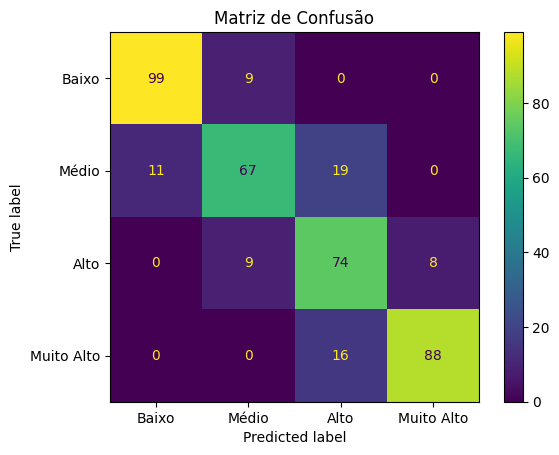

In [129]:
plt.rcParams.update(plt.rcParamsDefault)
mylabels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mylabels)
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

## Experimento 2

Agora nós iremos usar um dataset de teste que o proprio autor no kaggle deixou separado com mil instancias.

Repetiremos a mesma configuração do experimento anterior.

### Carregando e Verificando o Conjunto de Dados

In [103]:
# Carregando o dataset de teste
df_test = pd.read_csv("datasetMobile/test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [99]:
# Estatísticas descritivas do conjunto de dados
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [102]:
# Verificando se têm alguma célula vazia no arquivo.
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### Realizando o teste

- Removemos o único cammpo inrelevante di arquivo de testes ('id").
- Iremos continuar usando a varaivel modelo criada anteriormente e já treinada.

<AxesSubplot:ylabel='Predictions'>

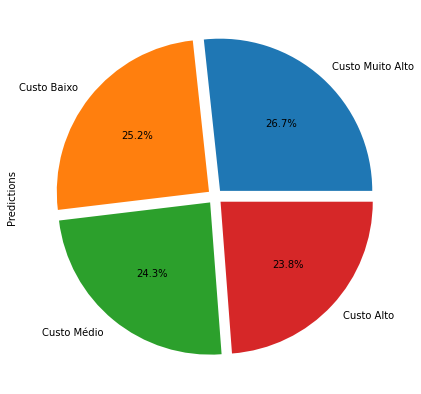

In [118]:
X_test = df_test.drop('id', axis=1)

predictions = modelo.predict(X_test)
mylabels = [ "Custo Muito Alto", "Custo Baixo", "Custo Médio", "Custo Alto"]
preds = pd.DataFrame(predictions,columns=['Predictions'])
preds['Predictions'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0.05, 0.05, 0.05], labels = mylabels ,figsize=(7, 7))


O grafico acima está a distribuição de nossas previsões finais. Podemos notar que o conjunto de dados do teste possuia uma mistura bastante equilibrada de faixas de preços com base nas previsões do nosso modelo.

``OBS: Os rótulos de price_range de teste reais não foram fornecidos neste conjunto de dados (não podemos medir a precisão neste caso).``

## Testando os Métodos

In [73]:
def ApplyesKFold(x_axis, y_axis, k):
    # Configuração KFold.
    # shuffle=True, Shuffle (embaralhar) o dataset.
    kfold = KFold(n_splits=k, shuffle=True)

    # Axis
    x = x_axis
    y = y_axis

    # Instancias de modelos.
    linearRegression = LinearRegression()
    elasticNet = ElasticNet()
    ridge = Ridge()
    lasso = Lasso()
    decisionTree = DecisionTreeClassifier(criterion="gini",splitter="best")
    neuralNetwork = MLPClassifier()

    # Aplica o KFold aos modelos.
    linearRegression_result = cross_val_score(linearRegression, x, y, cv=kfold)
    elasticNet_result = cross_val_score(elasticNet, x, y, cv=kfold)
    ridge_result = cross_val_score(ridge, x, y, cv=kfold)
    lasso_result = cross_val_score(lasso, x, y, cv=kfold)
    decisionTree_result = cross_val_score(decisionTree, x, y, cv=kfold)
    neuralNetwork_result = cross_val_score(neuralNetwork, x, y, cv=kfold)

    # Cria um dicionário para armazenar modelos lineares.
    dic_models = {
        "LinearRegression": [linearRegression_result.mean(),linearRegression_result.std(), linearRegression_result],
        "ElasticNet": [elasticNet_result.mean(),elasticNet_result.std(), elasticNet_result],
        "Ridge": [ridge_result.mean(),ridge_result.std(), ridge_result],
        "Lasso": [lasso_result.mean(),lasso_result.std(), lasso_result],
        "DecisionTree": [decisionTree_result.mean(), decisionTree_result.std(), decisionTree_result],
        "NeuralNetwork": [neuralNetwork_result.mean(), neuralNetwork_result.std(), neuralNetwork_result]
    }

    plt.figure(figsize = (32, 12))
    acuracia_data = []
    # Imprimindo acuracias
    for modelo, result in dic_models.items():
        mean = result[0]
        dv = result[1]
        acuracias = result[2]
        acuracia_data.append((modelo, [mean - 2*dv, mean + 2*dv, mean]))
        plt.plot(range(1,len(acuracias)+1), acuracias, label=modelo)
        # print("-"*10,modelo,"-"*10)
        # print('Acurácia média: {}'.format(mean))
        # print('Intervalo de acurácia: [{} ~ {}]\n'
        #     .format((mean - 2*dv), (mean + 2*dv)))
  
    acuracia_data = dict(acuracia_data)
    A = pd.DataFrame.from_dict(acuracia_data, orient='index',columns=['Min', 'Máx', 'Média'])
    print("Dataset da Acurácia")
    print(A)
    print()

    # Selecione o melhor modelo.
    bestModel = max(dic_models, key=dic_models.get)

    print("O melhor modelo é: {0} com valor: {1}".format(
        bestModel, dic_models[bestModel][0]))

    plt.xlabel('K - folds', fontsize=18) 
    plt.ylabel('Acurácia', fontsize=18) 
    plt.title('Porcetagem da acurácia por experimento', fontsize=18) 
    plt.legend(loc=3, fontsize=14)
    plt.show()


Dataset da Acurácia
                       Min       Máx     Média
LinearRegression  0.903843  0.929493  0.916668
ElasticNet        0.899081  0.933138  0.916109
Ridge             0.899060  0.934083  0.916572
Lasso             0.906534  0.925702  0.916118
DecisionTree      0.765918  0.897082  0.831500
NeuralNetwork     0.591754  0.718246  0.655000

O melhor modelo é: LinearRegression com valor: 0.9166678524980307


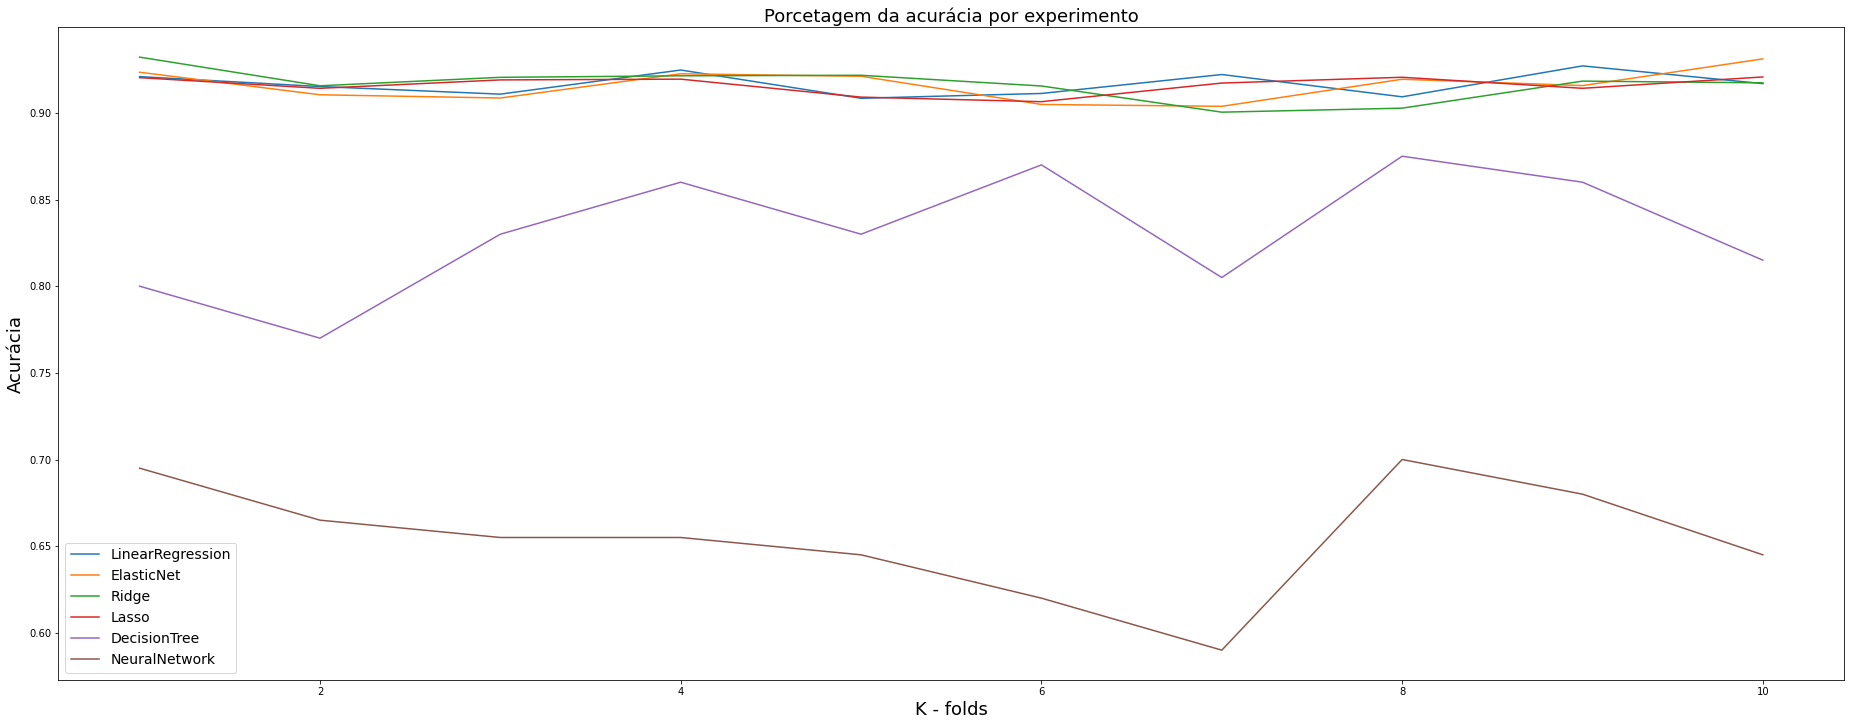

In [74]:
# Testanto com o k-Fold como cada modelo linear se sair e pegando sua melhor acuracia

ApplyesKFold(data_X, data_Y, 10)